In [5]:
def load(directory, option):
    if option.lower() == 'raw data':
        dirname = "/RawData/"
        extension = ".csv"

    files_list = [f for f in os.listdir(directory + dirname) if f.lower().endswith(extension)]
    list_objects = []
    for file in files_list:
        path = directory + dirname + file
        an_object = np.genfromtxt(path, delimiter=",")
        list_objects.extend(an_object)
    # return a list[Array_TimeSeries]
    return list_objects

In [6]:
def dot_products_2(q, t):
    # concatenante n-m zeros for Query
    m, n = len(q), len(t)
    # reverse the Query
    q_r = q[::-1]
    q_ra = np.concatenate([q_r, np.zeros(n - m)])
    q_raf = np.fft.fft(q_ra)
    t_af = np.fft.fft(t)
    qt = np.fft.ifft(q_raf * t_af)
    return qt
q = [1, 2, 3, 4]
t = [1, 2, 3, 4]
print(np.dot(q,t))
dot_products_2(q, t)

30


array([24.+0.j, 22.+0.j, 24.+0.j, 30.+0.j])

In [3]:
import pandas as pd
import numpy as np
path = "/Users/Jingwei/PycharmProjects/distributed_use/venv/TestDataset/UCR_TS_Archive_2015/StarLightCurves/"
filename= "StarLightCurves_TRAIN"
testFile = pd.read_csv(path+filename, header=None)
testFile.info()


/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 1025 entries, 0 to 1024
dtypes: float64(1024), int64(1)
memory usage: 7.8 MB


/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [1]:
dp = sm.calculate_distances(t,q,"mass_v1")

ModuleNotFoundError: No module named 'similarity_measures'

In [7]:
m_list =range(1, 10, 5)
print(m_list)

range(1, 10, 5)


In [4]:
import numpy as np
np.zeros()

TypeError: Required argument 'shape' (pos 1) not found

In [20]:
a = np.array([[1,2,3],[4,5,6],[7,8,9],[7,8,9]])
list(a)/2


TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [24]:
keys = range(0, 18)
len(keys)

18

In [22]:
shap_set = [1,2,3]

shap_set = [s for s in shap_set if s == 2]
shap_set

[2]

In [5]:
import numpy as np
a = np.array([])
b = np.append(a, [1,2])
c = np.concatenate([b, [1,2]],axis=0)
c

array([1., 2., 1., 2.])

In [10]:
a = [0.50797,2,4,5,6]
b = [1, 2, 3, 5.1, str(a)]
import pandas as pd
row1 = pd.DataFrame([a])
row2 = pd.DataFrame([b])
output = row1.append(row2)
output.to_csv("~/Downloads/output.csv", index=False)

In [6]:
  
from matplotlib import pyplot as plt

loss_k5_w10_stack02 = pd.read_csv("~/Desktop/ISMAP_results/k5_w10_stack02_loss.csv")
loss_k10_w10_stack02 = pd.read_csv("~/Desktop/ISMAP_results/k10_w10_stack02_loss.csv")
loss_k10_w20_stack10 = pd.read_csv("~/Desktop/ISMAP_results/k10_w20_stack10_loss.csv")
loss_k10_w20_stack10_loss_avgtest = pd.read_csv("~/Desktop/ISMAP_results/k10_w20_stack10_loss_avgtest.csv")
def draw_loss(loss_df):
    t_stamp = loss_df["t_stamp"].tolist()
    cum_loss = loss_df["cum_loss"].tolist()
    avg_loss = loss_df["avg_loss"].tolist()
    loss_batch = loss_df["loss_batch"].tolist()
    PH = loss_df["PH"].tolist()
    figure = plt.figure(figsize=(8,6), dpi=60)
    ax1 = figure.add_subplot(311)
    ax2 = figure.add_subplot(312, sharex = ax1)
    ax3 = figure.add_subplot(313, sharex = ax1)
    ax1.plot(t_stamp, cum_loss, label="cum_loss")
    ax2.plot(t_stamp, avg_loss, label="avg_loss")
    ax3.plot(t_stamp, PH, label="PH score")
    ax2.plot(t_stamp, loss_batch, label = "loss_batch")
    ax1.legend()
    ax2.legend()
    ax3.legend()
    plt.show()

def sigmoid(x, thelta, x0):
    return (1 / float(1 + np.exp(-thelta*(x-x0))))

def f_jump(x, thresh):
    if x > thresh: return 1
    elif x == thresh : return 0.5
    else: return 0
    
def draw_lossBatch(loss_df, thelta):
    t_stamp = loss_df["t_stamp"].tolist()
    loss_batch = loss_df["loss_batch"].tolist()
    x = np.arange(-1, 1.4, 0.01)
    figure = plt.figure(figsize=(8,6), dpi=60)
    ax1 = figure.add_subplot(111)
    ax1.set_xlabel("Dist(TS, Shapelet)", fontsize=12)
    ax1.set_ylabel("Loss Value", fontsize=12)
    ax1.plot(x, [sigmoid(point,thelta, 0.2) for point in x], 'b', label='Sigmoid Loss Function')
    #ax2.plot(t_stamp, loss_batch, label = "loss_batch")
    
    x_lossBatch = [np.divide(np.log(y/(1-y)), thelta) + 0.2 for y in loss_batch]
    ax1.scatter(x_lossBatch, loss_batch, c='r', label="TS Loss by Sigmoid")
    
    #ax1.vlines(0.2, 0, 1, colors = "r", linestyles = "dashed")
    ax1.plot(x, [f_jump(point, 0.2) for point in x], 'g', label='0-1 Loss Function')
    ax1.scatter(x_lossBatch, [f_jump(point, 0.2) for point in x_lossBatch], label="TS Loss by 0-1 Loss Func.")
    ax1.annotate('Dist. Threshold of Shapelet', xy=(0.2, 0), xytext=(0.4, 0.2),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12)
    ax1.legend()
    plt.savefig("/Users/Jingwei/Downloads/Loss_Func_Plot.eps")





/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log


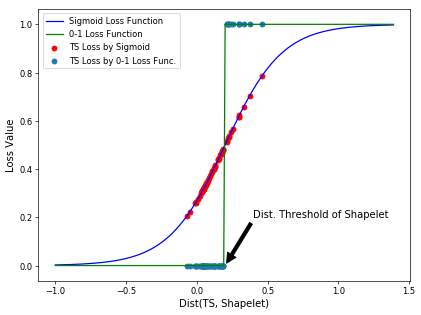

In [34]:
draw_lossBatch(loss_k10_w20_stack10, 5)
#draw_loss(loss_k10_w20_stack10_loss_avgtest)

In [7]:
shap_df_k5 = pd.read_csv("~/Desktop/ISMAP_results/k5_w10_stack02_shap.csv")
shap_df_k10 = pd.read_csv("~/Desktop/ISMAP_results/k10_w10_stack02_shap.csv")
shap_df_k10_w20_stack10 = pd.read_csv("~/Desktop/ISMAP_results/k10_w20_stack10_shap.csv")
def select_shapelet(shap_df, t_stamp, Class):
    return shap_df[shap_df["t_stamp"]==t_stamp][shap_df["shap.Class"]==Class]
def draw_shapelet(shap_df, firstK, t_stamp, Class):
    shap_subseq = shap_df['shap.subseq'].tolist()
    shap_score = shap_df['shap.score'].tolist()
    figure = plt.figure(figsize=(8,6), dpi=60)
    i = 1
    for shap in shap_subseq[:firstK]:
        shap_list = shap[1:-1].split()
        shap_list = [float(i) for i in shap_list]
        x = list(range(0, len(shap_list)))
        #ax = figure.add_subplot(int(firstK**0.5),int(firstK**0.5)+1, i)
        ax = figure.add_subplot(111)
        ax.plot(x, shap_list, label="Score: "+ str(round(shap_score[i-1],3)))
        ax.legend()
        i += 1
        #plt.savefig("/Users/Jingwei/Downloads/Shapelet_Time"+str(t_stamp)+"_Class"+str(Class)[:-2]+".eps")
    plt.show()
    

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


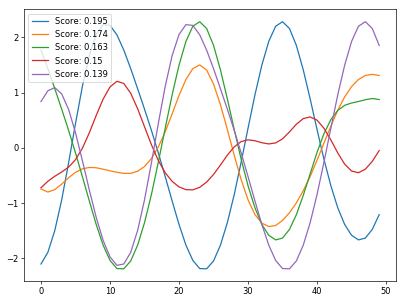

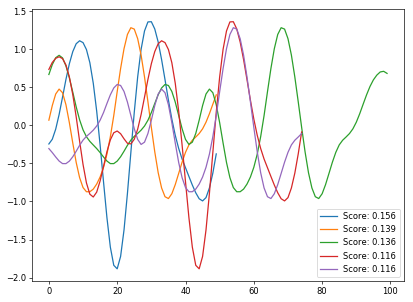

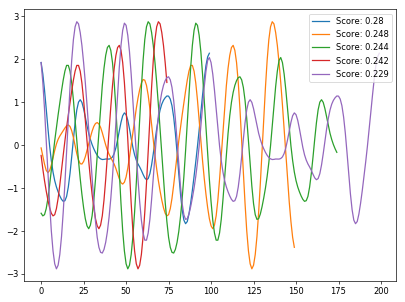

In [8]:
shap_df1 = select_shapelet(shap_df_k10,1010,1.0)
draw_shapelet(shap_df1, 5, 1010, 1.0)

shap_df2 = select_shapelet(shap_df_k10,990,1.0)
draw_shapelet(shap_df2, 5, 990, 1.0)

shap_df3 = select_shapelet(shap_df_k10,1010,-1.0)
draw_shapelet(shap_df3, 5, 1010, -1.0)


/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


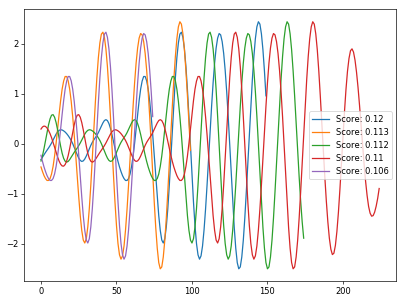

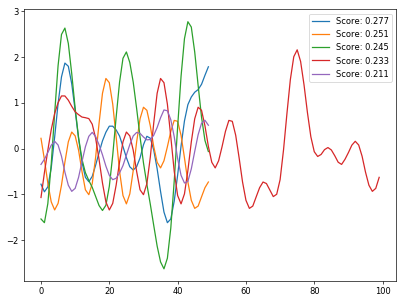

In [9]:
shap_df3 = select_shapelet(shap_df_k10,30,-1.0)
draw_shapelet(shap_df3, 5, 30,-1.0)

shap_df4 = select_shapelet(shap_df_k10,60,-1.0)
draw_shapelet(shap_df4, 5, 60,-1.0)

In [10]:

import numpy as np
import pandas as pd

from bokeh.plotting import figure, show, output_file
from bokeh.palettes import brewer

N = 20
cats = 10
df = pd.DataFrame(np.random.randint(10, 100, size=(N, cats))).add_prefix('y')
df

,y0,y1,y2,y3,y4,y5,y6,y7,y8,y9
0,13,89,76,16,88,81,35,47,66,79
1,65,96,68,90,19,66,32,95,98,46
2,25,67,46,83,91,90,95,76,60,78
3,49,92,60,21,70,34,56,31,66,96
4,55,57,30,62,69,93,44,65,21,44
5,56,77,73,37,23,49,98,98,75,20
6,43,28,62,55,98,23,79,54,87,55
7,58,16,35,68,31,92,32,35,66,48
8,73,19,99,60,48,89,41,86,88,67
9,94,29,37,81,34,24,22,68,92,86


In [11]:

def stacked(df):
    df_top = df.cumsum(axis=1)
    df_bottom = df_top.shift(axis=1).fillna({'y0': 0})[::-1]
    df_stack = pd.concat([df_bottom, df_top], ignore_index=True)
    return df_stack

areas = stacked(df)
colors = brewer['Spectral'][areas.shape[1]]
x2 = np.hstack((df.index[::-1], df.index))

p = figure(x_range=(0, N-1), y_range=(0, 800))
p.grid.minor_grid_line_color = '#eeeeee'

p.patches([x2] * areas.shape[1], [areas[c].values for c in areas],
          color=colors, alpha=0.8, line_color=None)

output_file('stacked_area.html', title='stacked_area.py example')

show(p)


In [12]:
plot = figure(plot_height=300, plot_width=500, title='Concept Drift Detection')
plot.line([1 ,5], [2,2], legend="avg_loss", line_color="red", line_width=2)

<div style="display: table;"><div style="display: table-row;"><div style="display: table-cell;"><b title="bokeh.models.renderers.GlyphRenderer">GlyphRenderer</b>(</div><div style="display: table-cell;">id&nbsp;=&nbsp;'1157', <span id="1168" style="cursor: pointer;">&hellip;)</span></div></div><div class="1167" style="display: none;"><div style="display: table-cell;"></div><div style="display: table-cell;">data_source&nbsp;=&nbsp;ColumnDataSource(id='1154', ...),</div></div><div class="1167" style="display: none;"><div style="display: table-cell;"></div><div style="display: table-cell;">glyph&nbsp;=&nbsp;Line(id='1155', ...),</div></div><div class="1167" style="display: none;"><div style="display: table-cell;"></div><div style="display: table-cell;">hover_glyph&nbsp;=&nbsp;None,</div></div><div class="1167" style="display: none;"><div style="display: table-cell;"></div><div style="display: table-cell;">js_event_callbacks&nbsp;=&nbsp;{},</div></div><div class="1167" style="display: none;"><div style="display: table-cell;"></div><div style="display: table-cell;">js_property_callbacks&nbsp;=&nbsp;{},</div></div><div class="1167" style="display: none;"><div style="display: table-cell;"></div><div style="display: table-cell;">level&nbsp;=&nbsp;'glyph',</div></div><div class="1167" style="display: none;"><div style="display: table-cell;"></div><div style="display: table-cell;">muted&nbsp;=&nbsp;False,</div></div><div class="1167" style="display: none;"><div style="display: table-cell;"></div><div style="display: table-cell;">muted_glyph&nbsp;=&nbsp;None,</div></div><div class="1167" style="display: none;"><div style="display: table-cell;"></div><div style="display: table-cell;">name&nbsp;=&nbsp;None,</div></div><div class="1167" style="display: none;"><div style="display: table-cell;"></div><div style="display: table-cell;">nonselection_glyph&nbsp;=&nbsp;Line(id='1156', ...),</div></div><div class="1167" style="display: none;"><div style="display: table-cell;"></div><div style="display: table-cell;">selection_glyph&nbsp;=&nbsp;None,</div></div><div class="1167" style="display: none;"><div style="display: table-cell;"></div><div style="display: table-cell;">subscribed_events&nbsp;=&nbsp;[],</div></div><div class="1167" style="display: none;"><div style="display: table-cell;"></div><div style="display: table-cell;">tags&nbsp;=&nbsp;[],</div></div><div class="1167" style="display: none;"><div style="display: table-cell;"></div><div style="display: table-cell;">view&nbsp;=&nbsp;CDSView(id='1158', ...),</div></div><div class="1167" style="display: none;"><div style="display: table-cell;"></div><div style="display: table-cell;">visible&nbsp;=&nbsp;True,</div></div><div class="1167" style="display: none;"><div style="display: table-cell;"></div><div style="display: table-cell;">x_range_name&nbsp;=&nbsp;'default',</div></div><div class="1167" style="display: none;"><div style="display: table-cell;"></div><div style="display: table-cell;">y_range_name&nbsp;=&nbsp;'default')</div></div></div>
<script>
(function() {
  var expanded = false;
  var ellipsis = document.getElementById("1168");
  ellipsis.addEventListener("click", function() {
    var rows = document.getElementsByClassName("1167");
    for (var i = 0; i < rows.length; i++) {
      var el = rows[i];
      el.style.display = expanded ? "none" : "table-row";
    }
    ellipsis.innerHTML = expanded ? "&hellip;)" : "&lsaquo;&lsaquo;&lsaquo;";
    expanded = !expanded;
  });
})();
</script>

In [13]:
data = {'x_values': [1, 2, 3, 4, 5],
        'y_values': [6, 7, 2, 3, 6]}
data['x_values']

[1, 2, 3, 4, 5]

In [14]:
from bokeh.models import ColumnDataSource, AjaxDataSource
data = {'x_values': [1, 2, 3, 4, 5],
        'y_values': [6, 7, 2, 3, 6]}
source = ColumnDataSource(data=data)
print(source.data["x_values"])

[1, 2, 3, 4, 5]


In [15]:
import numpy as np
test1 = np.array([1,2])
test2 = np.array([1,2])
a = ['1', '2']
b = ['1', '2']
animal = ['cat', 'dog', 'rabbit']
animal.append('guinea pig')
a.append(b)
a
#animal


['1', '2', ['1', '2']]

In [13]:
a = np.array([[1,2,3], [4,5,6], [7,8,9]])
#a[-2:][-2:]
#a[np.ix_([0,2],[1,2])]
a[:2, :2]


array([[1, 2],
       [4, 5]])

In [1]:
def sliding_window(sequence, win_size, step=1):
    # Verify the inputs
    try:
        it = iter(sequence)
    except TypeError:
        raise Exception("**ERROR** sequence must be iterable.")
    if not ((type(win_size) == type(0)) and (type(step) == type(0))):
        raise Exception("**ERROR** type(winSize) and type(step) must be int.")
    if step > win_size:
        raise Exception("**ERROR** step must not be larger than winSize.")
    if win_size > len(sequence):
        raise Exception("**ERROR** winSize must not be larger than sequence length.")

    # Pre-compute number of chunks to emit
    num_chunks = ((len(sequence) - win_size) / step) + 1

    # Do the work
    for i in range(0, int(num_chunks * step), step):
        yield sequence[i:i + win_size]

In [4]:
seq = [1,2,3,4,5]
print(list(sliding_window(seq, 2)))
#for elem in MP_all:
import re
MP_new = MP_list[0][2:-4].replace(' ', '').replace("\n", '')
MP_new = re.split(',', MP_new)
[float(num) for num in MP_new]




mp_unit = mp_list[0].replace('[','').replace('(','').replace(']','').replace(')','')
mp_unit.replace(' ', '').replace("\n", '').split(',')


[[1, 2], [2, 3], [3, 4], [4, 5]]


In [43]:
import pandas as pd 
import re
ts_id = 1
m = 8
dfMP = pd.read_csv("/Users/Jingwei/PycharmProjects/distributed_use/venv/TestDataset/UCR_TS_Archive_2015/TwoLeadECG/IntermediateResultMPs.csv")
#MP_all = dfMP['mp_dict_same'].tolist()[1:]
MP_one = dfMP[dfMP['ts_id']==ts_id][dfMP['m']==m]
mp_dict_same = MP_one['mp_dict_same'].tolist()[0]
mp_unit = mp_dict_same.replace('[','').replace('(','').replace(']','').replace(')','')
#mp_unit.split("array")[1].replace(' ', '').replace("\n", '').split(',')
#mp_dict_same.split("array")[1:]
mp_unit.split("array")[1:]


/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


['6.70345332e-07, 7.31094193e-07, 1.69576389e-07, 1.90203906e-07,\n       4.71219340e-07, 2.54797783e-07, 1.34009030e-06, 6.05131081e-07,\n       3.31894342e-07, 3.03503439e-07, 4.21511967e-07, 4.78570965e-07,\n       1.03411367e-07, 5.96280923e-08, 2.95090854e-08, 6.05111718e-08,\n       4.25691018e-07, 1.68650894e-07, 1.84181059e-07, 2.23111432e-07,\n       8.42946290e-08, 1.03477738e-07, 2.06689928e-07, 2.31928732e-07,\n       1.00330373e-06, 1.33080520e-06, 1.40586292e-06, 1.17577545e-06,\n       1.07049826e-06, 6.68476518e-07, 2.55257181e-07, 7.68522873e-07,\n       1.39195075e-06, 1.05346459e-06, 4.50332408e-07, 3.47864009e-07,\n       2.02520990e-07, 2.67303604e-07, ',
 '1.73656581, 1.75237225, 1.50240112, 0.90977242, 1.00720781,\n       0.70702348, 1.77621611, 1.34427547, 1.07131515, 1.61424874,\n       2.22526139, 2.70143013, 0.75089386, 0.20722011, 0.18730553,\n       0.7270424 , 1.5573095 , 0.4211837 , 0.36758999, 0.36492366,\n       0.30880076, 0.39944601, 0.42336909, 0.973

[1, 2, 3, 1, 2, 3]

In [163]:
hash("1FJubezif")

-1594173413788611145

In [79]:
import numpy as np 
import pandas as pd
df_file = pd.read_csv("/Users/Jingwei/PycharmProjects/distributed_use/venv/TestDataset/UCR_TS_Archive_2015/ElectricDevices/ElectricDevices_TRAIN",header=None)
print(len(df_file[df_file[0]==-1]))
print(len(df_file[df_file[0]==0]))
print(len(df_file[df_file[0]==1]))
print(len(df_file[df_file[0]==2]))
print(len(df_file[df_file[0]==3]))
print(len(df_file[df_file[0]==4]))
print(len(df_file[df_file[0]==5]))
print(len(df_file[df_file[0]==6]))
print(len(df_file[df_file[0]==7]))
#C_1: 292
#C_2: 177
#C_3: 10
#C_4: 19
#C_5: 2


0
0
727
2231
851
1474
2406
509
728


In [104]:
df_file_train = pd.read_csv("/Users/Jingwei/PycharmProjects/distributed_use/venv/TestDataset/UCR_TS_Archive_2015/ElectricDevices/ElectricDevices_TRAIN",header=None)
df_file_test = pd.read_csv("/Users/Jingwei/PycharmProjects/distributed_use/venv/TestDataset/UCR_TS_Archive_2015/ElectricDevices/ElectricDevices_TEST",header=None)
folder_ConceptDriftFile = "/Users/Jingwei/Desktop/ISMAP_results/concept_drift_files"
DriftFile_1 = folder_ConceptDriftFile + "/concept1.csv"
DriftFile_2 = folder_ConceptDriftFile + "/concept2.csv"
DriftFile_3 = folder_ConceptDriftFile + "/concept3.csv"
DriftFile_full = folder_ConceptDriftFile + "/conceptFull.csv"

def df_partition(dataframe):
    class_list = dataframe[0].drop_duplicates(keep='first', inplace=False)
    df_list = []
    for c in list(class_list):
        df_list.append(dataframe[dataframe[0]==c])
        #print(df)
    return df_list, list(class_list)


def concept_construct(df_list, class_list, partition_num):
    n_list = []
    for i in range(len(class_list)):
        datasize_i = len(df_list[i])
        n_list.append(int(datasize_i/partition_num))    
    df_Concept_list = []
    for i in range(partition_num):
        df_Concept = pd.DataFrame()
        for j in range(len(class_list)):
            start_index = i * n_list[j]
            end_index = (i+1) * n_list[j]
            df_Concept = df_Concept.append(df_list[j][start_index:end_index])
            df_Concept.reset_index(drop=True, inplace=True)
        #shift the label for each class distribution/subsets  
        df_Concept[0] = df_Concept[0] - i
        index_1 = 0
        index_2 = 0
        for k in range(i):
            index_2 += n_list[k]
        df_Concept[0][index_1:index_2] += len(class_list)
        df_Concept = df_Concept.sample(frac=1).reset_index(drop=True)
        df_Concept_list.append(df_Concept)
    return df_Concept_list

elemt1, elemt2 = df_partition(df_file_train)
df_list = concept_construct(elemt1, elemt2, 3)

df_full = pd.DataFrame()
for df in df_list:
    df_full = df_full.append(df)
df_list[0].to_csv(DriftFile_1, index=False)
df_list[1].to_csv(DriftFile_2, index=False)
df_list[2].to_csv(DriftFile_3, index=False)
df_full.to_csv(DriftFile_full, index=False)


/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


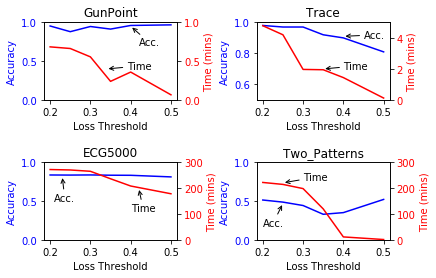

In [47]:
from matplotlib import pyplot as plt
x_1 = [0.2, 0.25, 0.3, 0.35, 0.4, 0.5]
acc_1 = [0.98, 0.97, 0.97, 0.92, 0.90, 0.81]
time_1 = [4.7833, 4.20, 1.97, 1.9490, 1.4442, 0.1265]

x_2 = [0.2, 0.25, 0.3, 0.35, 0.4, 0.5]
acc_2 = [0.8346, 0.8335, 0.8352, 0.8316, 0.8306, 0.81]
time_2 = [271.44, 269.74, 264.66, 235.81, 207.81, 177.86]

x_3 = [0.2, 0.25, 0.3, 0.35, 0.4, 0.5]
acc_3 = [0.5123, 0.4853, 0.4415, 0.3285, 0.35, 0.52]
time_3 = [221.54, 213.98, 197.81, 119.41, 11.14, 1.05]

x_4 = [0.2, 0.25, 0.3, 0.35, 0.4, 0.5]
acc_4 = [0.9533, 0.8800, 0.9467, 0.9133, 0.9600, 0.9677]
time_4 = [0.6844, 0.6634, 0.5557, 0.2403, 0.36, 0.067]

figure = plt.figure()
plt.subplots_adjust(left=0.1, right=0.9, wspace = 0.6, hspace = 0.8)

ax4_1= figure.add_subplot(221)
ax4_1.set_ylim(0, 1)
ax4_1.set_title("GunPoint")
ax4_1.plot(x_4, acc_4, color='blue')
ax4_1.set_xlabel('Loss Threshold')
ax4_1.set_ylabel('Accuracy', color='blue')
ax4_1.tick_params(axis='y', labelcolor='blue')
ax4_1.annotate('Acc.', xy=(0.4, 0.95), xytext=(0.42, 0.7),
            arrowprops=dict(arrowstyle="->", facecolor='black'), fontsize=10)

ax4_2 = ax4_1.twinx()
ax4_2.set_ylim(0, 1)
ax4_2.plot(x_4, time_4, color='red')
ax4_2.set_ylabel('Time (mins)', color='red')
ax4_2.tick_params(axis='y', labelcolor='red')
ax4_2.annotate('Time', xy=(0.34, 0.4), xytext=(0.39, 0.4),
            arrowprops=dict(arrowstyle="->", facecolor='black'), fontsize=10)

ax1_1 = figure.add_subplot(222)
ax1_1.set_ylim(0.5, 1)
ax1_1.set_title("Trace")
ax1_1.plot(x_1, acc_1, color='blue')
ax1_1.set_xlabel('Loss Threshold')
ax1_1.set_ylabel('Accuracy', color='blue')
ax1_1.tick_params(axis='y', labelcolor='blue')
ax1_1.annotate('Acc.', xy=(0.4, 0.91), xytext=(0.45, 0.9),
            arrowprops=dict(arrowstyle="->", facecolor='black'), fontsize=10)

ax1_2 = ax1_1.twinx()
ax1_2.set_ylim(0, 5)
ax1_2.plot(x_1, time_1, color='red')
ax1_2.set_ylabel('Time (mins)', color='red')
ax1_2.tick_params(axis='y', labelcolor='red')
ax1_2.annotate('Time', xy=(0.35, 2), xytext=(0.4, 2),
            arrowprops=dict(arrowstyle="->", facecolor='black'), fontsize=10)

ax2_1 = figure.add_subplot(223)
ax2_1.set_ylim(0, 1)
ax2_1.set_title("ECG5000")
ax2_1.plot(x_2, acc_2, color='blue')
ax2_1.set_xlabel('Loss Threshold')
ax2_1.set_ylabel('Accuracy', color='blue')
ax2_1.tick_params(axis='y', labelcolor='blue')
ax2_1.annotate('Acc.', xy=(0.23, 0.82), xytext=(0.21, 0.5),
            arrowprops=dict(arrowstyle="->", facecolor='black'), fontsize=10)

ax2_2 = ax2_1.twinx()
ax2_2.set_ylim(0, 300)
ax2_2.plot(x_2, time_2, color='red')
ax2_2.set_ylabel('Time (mins)', color='red')
ax2_2.tick_params(axis='y', labelcolor='red')
ax2_2.annotate('Time', xy=(0.42, 200), xytext=(0.4, 110),
            arrowprops=dict(arrowstyle="->", facecolor='black'), fontsize=10)

ax3_1 = figure.add_subplot(224)
ax3_1.set_ylim(0, 1)
ax3_1.set_title("Two_Patterns")
ax3_1.plot(x_3, acc_3, color='blue')
ax3_1.set_xlabel('Loss Threshold')
ax3_1.set_ylabel('Accuracy', color='blue')
ax3_1.tick_params(axis='y', labelcolor='blue')
ax3_1.annotate('Acc.', xy=(0.25, 0.47), xytext=(0.2, 0.18),
            arrowprops=dict(arrowstyle="->", facecolor='black'), fontsize=10)

ax3_2 = ax3_1.twinx()
ax3_2.set_ylim(0, 300)
ax3_2.plot(x_3, time_3, color='red')
ax3_2.set_ylabel('Time (mins)', color='red')
ax3_2.tick_params(axis='y', labelcolor='red')
ax3_2.annotate('Time', xy=(0.25, 220), xytext=(0.3, 230),
            arrowprops=dict(arrowstyle="->", facecolor='black'), fontsize=10)


plt.savefig("/Users/Jingwei/Downloads/IncrementalResults.eps")
plt.show()

In [94]:
n = []
n.append(1)
print(n)

[1]
